# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

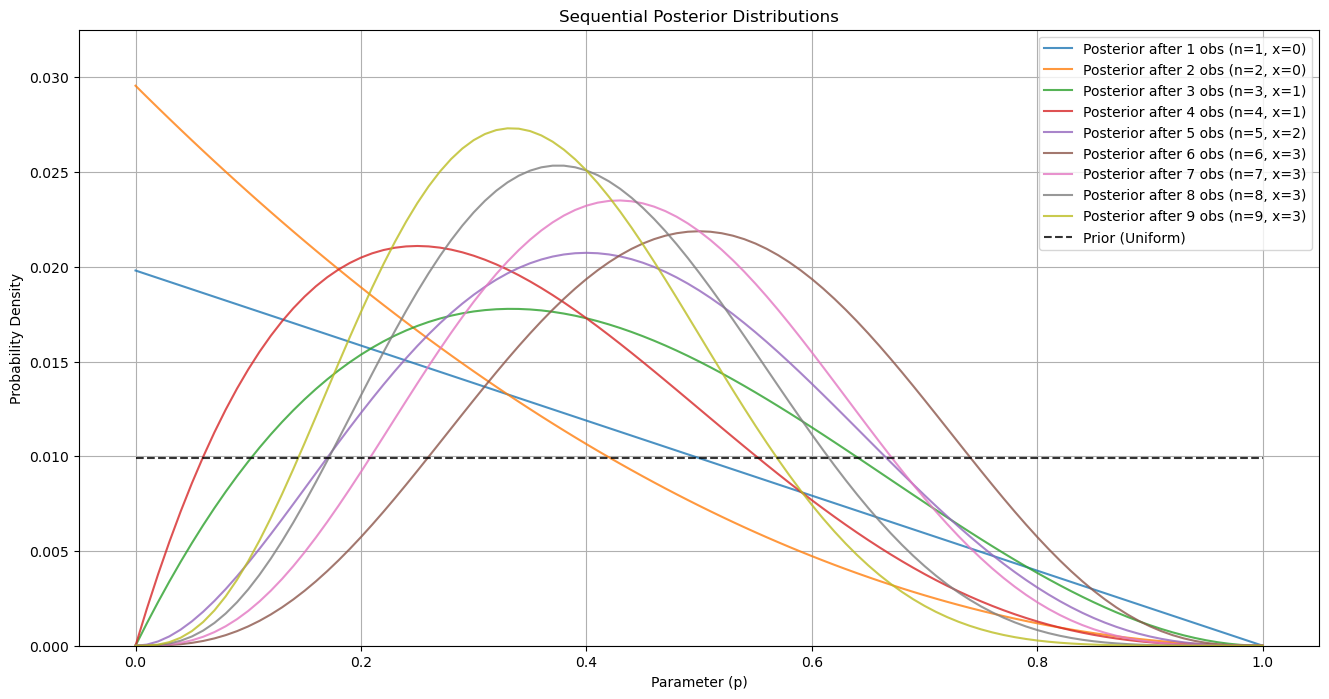

In [6]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0, 1, 101)  # 101 discrete points from 0 to 1
prior = np.ones(101) / 101  # Uniform prior
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]  # Observed data

# Plotting setup
plt.figure(figsize=(16, 8))
plt.title("Sequential Posterior Distributions")
plt.xlabel("Parameter (p)")
plt.ylabel("Probability Density")
plt.grid(True)

# Sequential updating
n, x = 0, 0  # Initialize counts
max_posterior = 0  # Track the max value for y-axis scaling

for i, observation in enumerate(observations):
    # Update likelihood and posterior
    likelihood = stats.bernoulli.pmf(observation, parameter_domain)
    posterior = prior * likelihood
    posterior /= posterior.sum()  # Normalize to sum to 1
    
    # Update max_posterior for dynamic scaling
    max_posterior = max(max_posterior, posterior.max())
    
    # Plot posterior distribution
    plt.plot(parameter_domain, posterior, label=f"Posterior after {i + 1} obs (n={n + 1}, x={x + observation})", alpha=0.8)
    
    # Update prior for the next iteration
    prior = posterior
    n += 1
    x += observation

# Add the initial prior as a dashed line for reference
plt.plot(parameter_domain, np.ones(101) / 101, label="Prior (Uniform)", linestyle='dashed', color='k', alpha=0.8)

# Adjust y-axis to fit all posteriors
plt.ylim(0, max_posterior * 1.1)  # Scale slightly above the maximum posterior
plt.legend()
plt.show()

Posterior proportional to Likelihood $\times$ Prior

Thus, Posterior = $P(\theta | n, x, \alpha) \propto \theta^{x}(1-\theta)^{n-x} \times \frac{1}{101}$ 

This follows the Kernel of $\text{Beta}(x+1, n-x+1)$ and is, therefore, the  distribution of the posterior. 

# Q2


1. This follows a beta distribution. More specifically, $\text{Beta}(x_j^{(t)}+\alpha_j, n_j^{(t)}-x_j^{(t)}+\beta_j)$ for each j and at a time t


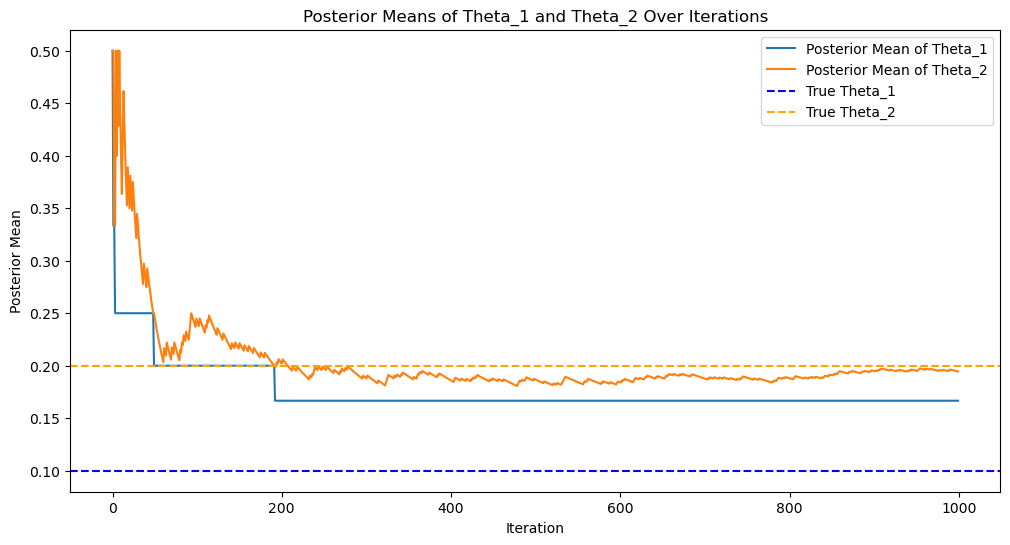

Theta_2 is larger.


In [22]:
# Initialize parameters
alpha1, beta1 = 1, 1  # Prior parameters for theta_1
alpha2, beta2 = 1, 1  # Prior parameters for theta_2
m = 1000  # Number of iterations to run the algorithm

theta1_true = 0.1  # True value of theta_1
theta2_true = 0.2  # True value of theta_2

# Initialize counters for successes and trials
x1, n1 = 0, 0  # For theta_1
x2, n2 = 0, 0  # For theta_2

# Store posterior means for plotting
posterior_means_theta1 = []
posterior_means_theta2 = []



# Run the algorithm
for t in range(m):
    # Calculate posterior distributions
    posterior_theta1 = stats.beta(alpha1 + x1, beta1 + n1 - x1)
    posterior_theta2 = stats.beta(alpha2 + x2, beta2 + n2 - x2)

    # Probability of theta1 < theta2 based on current posteriors
    prob_theta1_lt_theta2 = np.mean(posterior_theta1.mean() < posterior_theta2.mean())

    # Flip a coin based on true values of theta1 or theta2
    if np.random.rand() < prob_theta1_lt_theta2:
        outcome = np.random.rand() < theta2_true
        n2 += 1
        if outcome:
            x2 += 1
    else:
        outcome = np.random.rand() < theta1_true
        n1 += 1
        if outcome:
            x1 += 1
        # Update posterior means for plotting
    posterior_means_theta1.append(posterior_theta1.mean())
    posterior_means_theta2.append(posterior_theta2.mean())

    
# Plot posterior means over time
plt.figure(figsize=(12, 6))
plt.plot(posterior_means_theta1, label='Posterior Mean of Theta_1')
plt.plot(posterior_means_theta2, label='Posterior Mean of Theta_2')
plt.axhline(theta1_true, color='blue', linestyle='--', label='True Theta_1')
plt.axhline(theta2_true, color='orange', linestyle='--', label='True Theta_2')
plt.xlabel('Iteration')
plt.ylabel('Posterior Mean')
plt.legend()
plt.title('Posterior Means of Theta_1 and Theta_2 Over Iterations')
plt.show()
        
    
# Determine which theta is larger
if (alpha1 + x1) / (alpha1 + beta1 + n1) > (alpha2 + x2) / (alpha2 + beta2 + n2):
    print("Theta_1 is larger.")
else:
    print("Theta_2 is larger.")

# Q3

In [1]:
import numpy as np
from scipy.stats import beta, dirichlet

# Initialize parameters for three entities
alpha = np.array([1.1, 1.1, 1.1])  # Prior alpha for Dirichlet-multinomial
beta_params = [(1, 1), (1, 1), (1, 1)]  # Prior alpha and beta for each Beta-Binomial entity
n_iterations = 100  # Number of iterations to run the algorithm

# True success probabilities for each entity
true_thetas = [0.7, 0.5, 0.6]

# Initialize counters for successes and trials for each entity
successes = np.array([0, 0, 0])
trials = np.array([0, 0, 0])

# Store results for analysis
posterior_means_independent = []  # Beta-binomial posterior means
posterior_means_joint = []  # Dirichlet-multinomial posterior means

# Run the algorithm
for t in range(n_iterations):
    # Analysis 1: Beta-binomial independent updates
    beta_posterior_means = [
        (beta_params[i][0] + successes[i]) / (beta_params[i][0] + beta_params[i][1] + trials[i])
        for i in range(3)
    ]

    # Analysis 2: Dirichlet-multinomial joint update
    dirichlet_posterior = dirichlet(alpha + successes)
    dirichlet_posterior_mean = dirichlet_posterior.mean()

    # Simulate decision-making: choose entity with highest posterior mean (exploration-exploitation)
    entity_to_update = (
        np.random.choice(3) if np.random.rand() < 0.1 else np.argmax(beta_posterior_means)
    )

    # Simulate binary outcome for the chosen entity
    outcome = np.random.rand() < true_thetas[entity_to_update]
    trials[entity_to_update] += 1
    if outcome:
        successes[entity_to_update] += 1

    # Update posterior means for analysis
    posterior_means_independent.append(beta_posterior_means.copy())
    posterior_means_joint.append(dirichlet_posterior_mean)

# Final posterior mean comparison
print("Final Beta-Binomial Posterior Means:", posterior_means_independent[-1])
print("Final Dirichlet-Multinomial Posterior Means:", posterior_means_joint[-1])

print("Analysis 1 (Beta-Binomial) assumes independence between entities, which is suitable when the entities do not share underlying factors influencing their outcomes. For example, testing independent advertising strategies for different customer segments.")
print("Analysis 2 (Dirichlet-Multinomial) considers joint modeling, capturing potential dependencies between entities. This is useful in contexts like resource allocation across correlated tasks.")

print("Real-world Example:")
print("In an A/B/n testing scenario for optimizing online content engagement, Analysis 1 could analyze click-through rates for each piece of content independently. Analysis 2 could model the overall user engagement probabilities jointly, leveraging shared user behaviors to balance exploration and exploitation across all content options.")

Final Beta-Binomial Posterior Means: [0.3333333333333333, 0.2, 0.5494505494505495]
Final Dirichlet-Multinomial Posterior Means: [0.05709024 0.02025783 0.92265193]
Analysis 1 (Beta-Binomial) assumes independence between entities, which is suitable when the entities do not share underlying factors influencing their outcomes. For example, testing independent advertising strategies for different customer segments.
Analysis 2 (Dirichlet-Multinomial) considers joint modeling, capturing potential dependencies between entities. This is useful in contexts like resource allocation across correlated tasks.
Real-world Example:
In an A/B/n testing scenario for optimizing online content engagement, Analysis 1 could analyze click-through rates for each piece of content independently. Analysis 2 could model the overall user engagement probabilities jointly, leveraging shared user behaviors to balance exploration and exploitation across all content options.


Analysis 1 (Beta-Binomial) assumes independence between entities, which is suitable when the entities do not share underlying factors influencing their outcomes. For example, testing independent advertising strategies for different customer segments. Analysis 2 (Dirichlet-Multinomial) considers joint modeling, capturing potential dependencies between entities.

Real-world Example:

In an A/B testing scenario for optimizing online engagement, Analysis 1 could analyze click-through rates for each piece of content independently. Analysis 2 could model the overall user engagement probabilities jointly to balance exploration and exploitation across all content options.